# CODSOFT TASK-1 CREDIT CARD FRAUD DETECTION

### IMPORTING LIBRARIES

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### READING DATASET

In [25]:
df=pd.read_csv('creditcard.csv')

### DATA CLEANING AND PREPROCESSING

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### REMOVING UNNECESSARY FACTORS

In [7]:
df.duplicated().sum()

1081

In [8]:
df.drop_duplicates(inplace=True)

### EXPLORATORY DATA ANALYSIS

<Axes: xlabel='Class', ylabel='Time'>

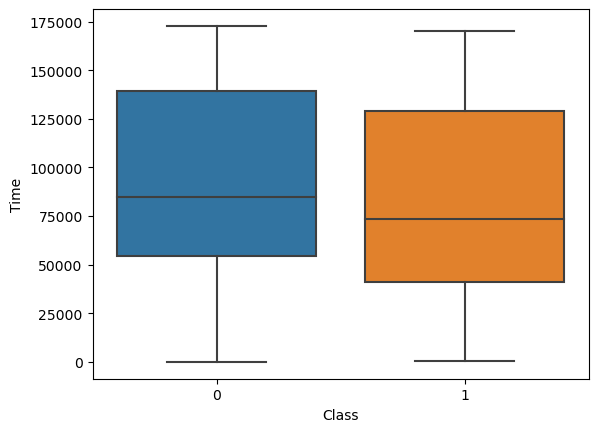

In [9]:
sns.boxplot(x='Class',y='Time',data=df)

### HEAVILY BIASED DATASET

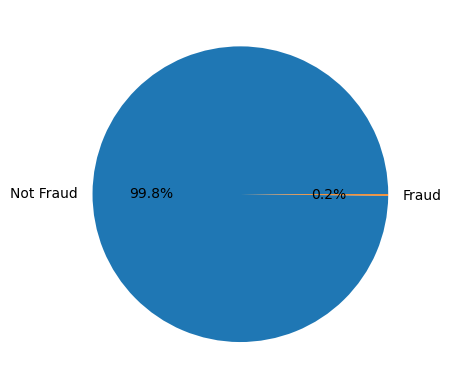

In [10]:
plt.pie(x=df['Class'].value_counts(),labels=['Not Fraud','Fraud'],autopct="%0.1f%%")
plt.show()

In [11]:
def plot_correlations(df):
    df=df[[col for col in df if df[col].nunique()>1]]
    plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
    corr=df.corr()
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title('Correlation Matrix')
    plt.show()

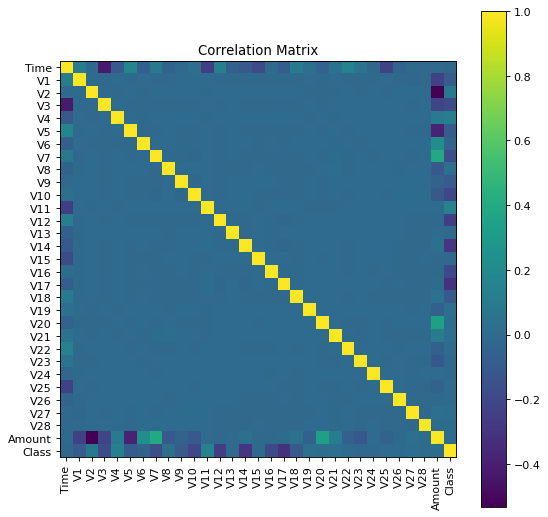

In [12]:
plot_correlations(df)

In [13]:

def plot_distributions(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if 1 < nunique[col] < 50]]
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = int((nCol + nGraphPerRow - 1) / nGraphPerRow)  
    plt.figure(num=None, figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')
    
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        
        if not np.issubdtype(type(columnDf.iloc[0]), np.number):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')
    
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()


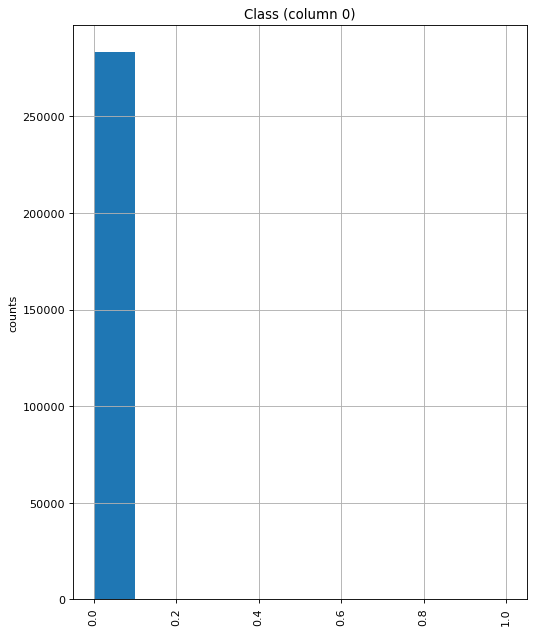

In [14]:
plot_distributions(df,10,5)

### SPLITTING THE FEATURES FROM DATASET

In [15]:
x=df.drop(['Class','Time'],axis=1)
y=df['Class']

### CONVERTING TRAINING AND TESTING DATASETS

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.03)

In [17]:
x_train.shape,x_test.shape

((275214, 29), (8512, 29))

### IMPORTING ALGORITHMS 

In [18]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [19]:
svc = SVC(kernel='sigmoid', gamma=1.0)
lr = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)

In [20]:
algos={
    'SVC':svc,
    'LR':lr,
    'RFC':rfc,
    'XGB':xgb,
    'BC':bc,
}

In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [24]:
pre_acc = {}
for name,algo in algos.items():
    algo.fit(x_train, y_train)
    y_pred = algo.predict(x_test)
    pre_acc[name] = {
        'Precision': precision_score(y_test, y_pred),
        'Accuracy': accuracy_score(y_test, y_pred),
        'Confusion Matrix': confusion_matrix(y_test, y_pred),
    }

### CHECKING ACCURACY FOR ALORITHM

In [25]:
pre_acc

{'SVC': {'Precision': 0.045454545454545456,
  'Accuracy': 0.9958881578947368,
  'Confusion Matrix': array([[8476,   21],
         [  14,    1]])},
 'LR': {'Precision': 0.8888888888888888,
  'Accuracy': 0.9990601503759399,
  'Confusion Matrix': array([[8496,    1],
         [   7,    8]])},
 'RFC': {'Precision': 0.9230769230769231,
  'Accuracy': 0.9995300751879699,
  'Confusion Matrix': array([[8496,    1],
         [   3,   12]])},
 'XGB': {'Precision': 0.9230769230769231,
  'Accuracy': 0.9995300751879699,
  'Confusion Matrix': array([[8496,    1],
         [   3,   12]])},
 'BC': {'Precision': 0.9230769230769231,
  'Accuracy': 0.9995300751879699,
  'Confusion Matrix': array([[8496,    1],
         [   3,   12]])}}

### BALANCING IMBALANCED DATASETS

In [28]:
from sklearn.utils import resample


fraud_df = df[df['Class'] == 1]
non_fraud_df = df[df['Class'] == 0]


non_fraud_downsampled = resample(non_fraud_df,
                                 replace=False,  
                                 n_samples=len(fraud_df),
                                 random_state=42)  

new_df = pd.concat([non_fraud_downsampled, fraud_df])

new_df = new_df.sample(frac=1, random_state=42)

In [29]:
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
126265,77970.0,1.222435,-0.482973,1.006126,-0.629278,-1.545401,-1.058787,-0.699653,0.058106,2.098220,...,-0.013621,0.112532,0.028354,0.681553,0.389823,-0.700175,0.081159,0.034358,1.00,0
125569,77720.0,1.372852,-0.600069,-1.982242,-1.652596,1.875989,2.850328,-0.650839,0.633996,-1.195478,...,0.085969,-0.090311,-0.211467,0.957720,0.811915,-0.137130,-0.013380,0.031342,69.79,0
182992,125612.0,1.889618,1.073099,-1.678018,4.173268,1.015516,-0.009389,-0.079706,0.064071,-0.714517,...,0.203728,0.733796,-0.036560,0.334306,0.147171,0.279556,0.031669,0.035883,3.22,1
271257,164489.0,0.039062,0.889239,0.302199,-0.585161,0.431838,-1.116524,1.050711,-0.232965,-0.109813,...,-0.253421,-0.535450,0.072419,0.050588,-0.475029,0.136236,0.248946,0.098623,5.99,0
230281,146267.0,-0.629286,1.379787,-0.297018,-1.393297,1.489655,-0.885139,1.872444,-0.523914,-0.590964,...,0.158709,0.782369,-0.492603,0.834802,0.546616,0.155325,0.091849,0.002683,7.57,0


In [36]:
new_df.shape

(946, 31)

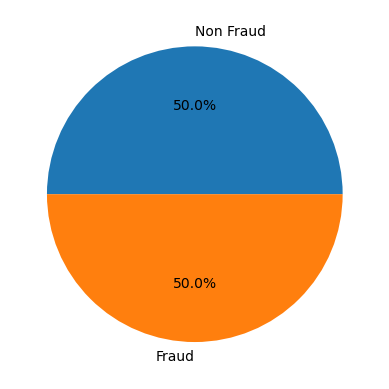

In [32]:
plt.pie(new_df['Class'].value_counts(),labels=['Non Fraud','Fraud'],autopct='%0.1f%%')
plt.show()

In [37]:
x_new=new_df.drop(['Time','Class'],axis=1)
y_new=new_df['Class']
x_train_new,x_test_new,y_train_new,y_test_new=train_test_split(x_new,y_new,random_state=42,test_size=0.1)

In [38]:
x_train_new.shape,x_test_new.shape

((851, 29), (95, 29))

In [39]:
pre_acc_balanced = {}
for name,algo in algos.items():
    algo.fit(x_train_new, y_train_new)
    y_pred = algo.predict(x_test_new)
    pre_acc_balanced[name] = {
        'Precision': precision_score(y_test_new, y_pred),
        'Accuracy': accuracy_score(y_test_new, y_pred),
        'Confusion Matrix': confusion_matrix(y_test_new, y_pred),
    }

In [40]:
pre_acc_balanced

{'SVC': {'Precision': 0.5853658536585366,
  'Accuracy': 0.631578947368421,
  'Confusion Matrix': array([[36, 17],
         [18, 24]])},
 'LR': {'Precision': 0.9512195121951219,
  'Accuracy': 0.9473684210526315,
  'Confusion Matrix': array([[51,  2],
         [ 3, 39]])},
 'RFC': {'Precision': 1.0,
  'Accuracy': 0.968421052631579,
  'Confusion Matrix': array([[53,  0],
         [ 3, 39]])},
 'XGB': {'Precision': 0.9285714285714286,
  'Accuracy': 0.9368421052631579,
  'Confusion Matrix': array([[50,  3],
         [ 3, 39]])},
 'BC': {'Precision': 0.975,
  'Accuracy': 0.9578947368421052,
  'Confusion Matrix': array([[52,  1],
         [ 3, 39]])}}

In [ ]:
rfc.fit(x_train_new,y_train_new)

In [42]:
from sklearn.metrics import classification_report

In [44]:
print(classification_report(y_test_new,rfc.predict(x_test_new)))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        53
           1       1.00      0.93      0.96        42

    accuracy                           0.97        95
   macro avg       0.97      0.96      0.97        95
weighted avg       0.97      0.97      0.97        95



### SAVING MODEL

In [46]:
import joblib as jb

In [49]:
jb.dump(rfc,'Credit_Card_Fraud_Detection')

['Credit_Card_Fraud_Detection']

In [50]:
rfc = jb.load('Credit_Card_Fraud_Detection')

In [51]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')